## Introduction to Linear Regression Data Mining

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [2]:
data = pd.read_excel("wage_data.xlsx")

In [3]:
data.head()

,MARRIED,NONWHITE,NORTHCEN,PROFSERV,SOUTH,TENURSQ,TRADE,WEST,FEMALE,EXPER,EDUC,WAGE
0,0,0,0,0,0,0,0,1,1,2,11,31000.0
1,1,0,0,0,0,4,0,1,1,22,12,32400.0
2,0,0,0,0,0,0,1,1,0,2,11,30000.0
3,1,0,0,0,0,784,0,1,0,44,8,60000.0
4,1,0,0,0,0,4,0,1,0,7,12,53000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MARRIED   526 non-null    int64  
 1   NONWHITE  526 non-null    int64  
 2   NORTHCEN  526 non-null    int64  
 3   PROFSERV  526 non-null    int64  
 4   SOUTH     526 non-null    int64  
 5   TENURSQ   526 non-null    int64  
 6   TRADE     526 non-null    int64  
 7   WEST      526 non-null    int64  
 8   FEMALE    526 non-null    int64  
 9   EXPER     526 non-null    int64  
 10  EDUC      526 non-null    int64  
 11  WAGE      526 non-null    float64
dtypes: float64(1), int64(11)
memory usage: 49.4 KB


In [5]:
data.describe().round(2)

,MARRIED,NONWHITE,NORTHCEN,PROFSERV,SOUTH,TENURSQ,TRADE,WEST,FEMALE,EXPER,EDUC,WAGE
count,526.00,526.0,526.00,526.00,526.00,526.00,526.00,526.00,526.00,526.00,526.00,526.00
mean,0.61,0.1,0.25,0.26,0.36,78.15,0.29,0.17,0.48,17.02,12.56,58961.03
std,0.49,0.3,0.43,0.44,0.48,199.43,0.45,0.38,0.50,13.57,2.77,36930.86
min,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,5300.00
25%,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,12.00,33300.00
50%,1.00,0.0,0.00,0.00,0.00,4.00,0.00,0.00,0.00,13.50,12.00,46500.00
75%,1.00,0.0,0.75,1.00,1.00,49.00,1.00,0.00,1.00,26.00,14.00,68800.00
max,1.00,1.0,1.00,1.00,1.00,1936.00,1.00,1.00,1.00,51.00,18.00,249800.00


In [6]:
 data.groupby(["MARRIED","NONWHITE"])[["WAGE"]].agg(['mean','median','std']).round(2)

WAGE                   
                      mean   median       std
MARRIED NONWHITE                             
0       0         49345.56  39150.0  29881.29
        1         42161.54  35000.0  20349.78
1       0         65665.41  54400.0  40304.79
        1         66457.14  59250.0  35725.23

In [7]:
 data.groupby(["FEMALE","NONWHITE"])[["WAGE"]].agg(['mean','median','std']).round(2)

WAGE                   
                     mean   median       std
FEMALE NONWHITE                             
0      0         71653.06  60000.0  42210.21
       1         65434.48  54300.0  36302.15
1      0         46262.11  37500.0  25891.99
       1         42376.00  35000.0  19074.81

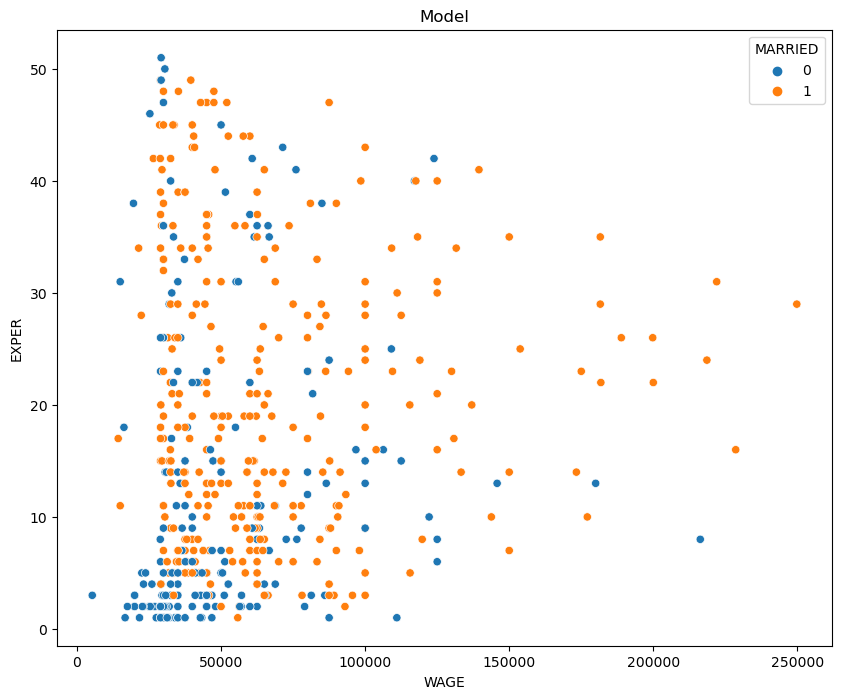

In [8]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.scatterplot(data = data , x = "WAGE", y = "EXPER", hue = "MARRIED")
plt.xlabel("WAGE")
plt.ylabel("EXPER");

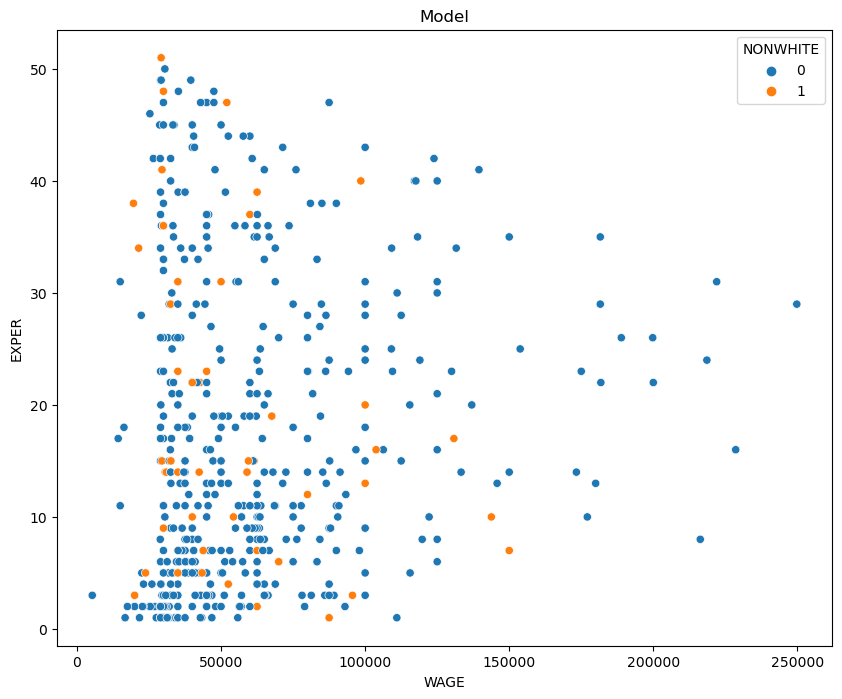

In [9]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.scatterplot(data = data , x = "WAGE", y = "EXPER", hue = "NONWHITE")
plt.xlabel("WAGE")
plt.ylabel("EXPER");

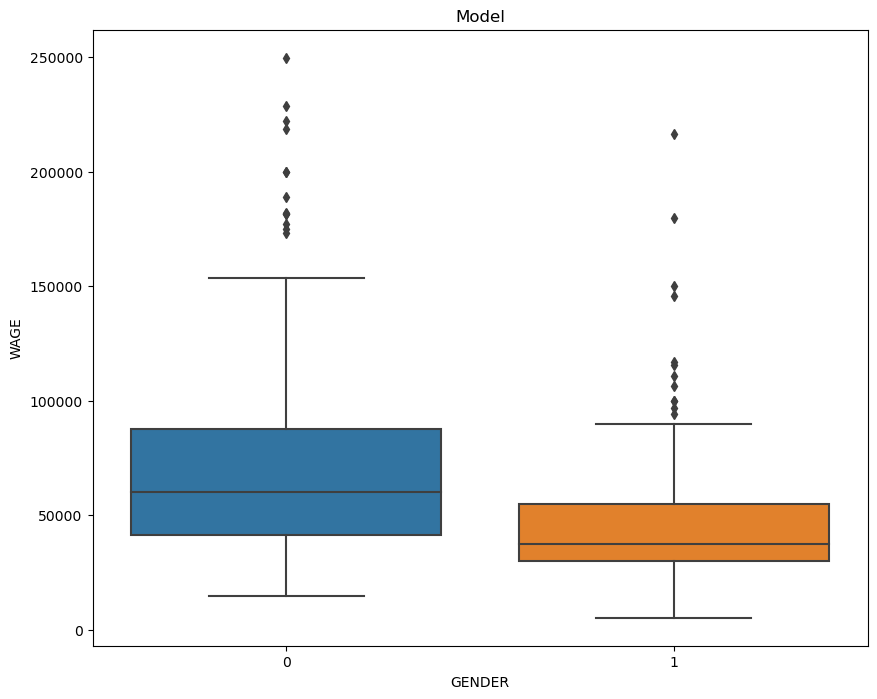

In [10]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.boxplot(data = data , x = "FEMALE", y = "WAGE")
plt.xlabel("GENDER")
plt.ylabel("WAGE");

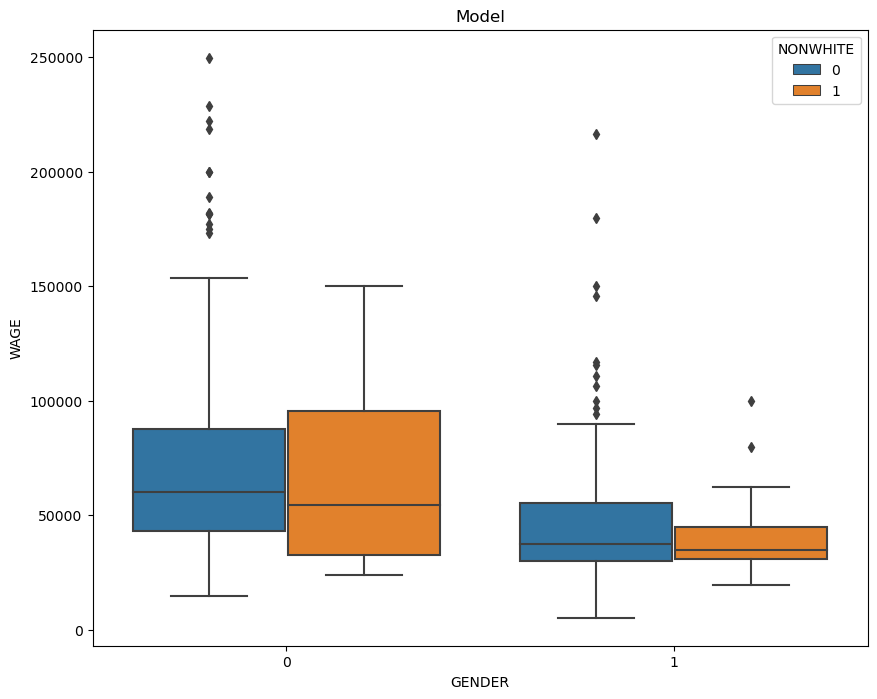

In [11]:
plt.figure(figsize=(10,8))
plt.title("Model")
sns.boxplot(data = data , x = "FEMALE", y = "WAGE", hue = "NONWHITE")
plt.xlabel("GENDER")
plt.ylabel("WAGE");

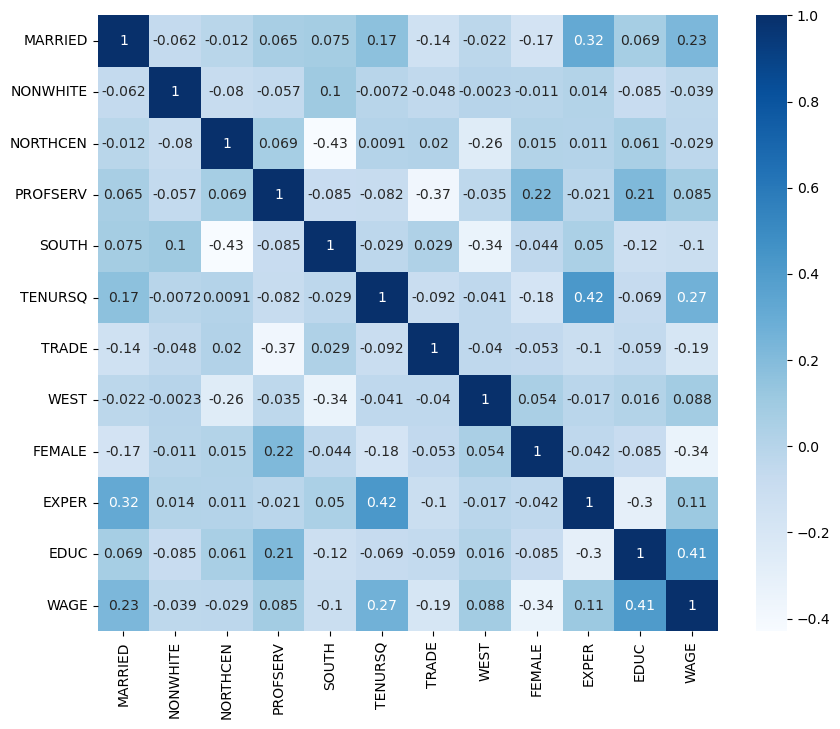

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot = True , cmap = "Blues");

In [13]:
y = data[["WAGE"]]
X = data[["NONWHITE", "NORTHCEN", "PROFSERV", "SOUTH",
          "TENURSQ", "TRADE", "WEST", "FEMALE", "EXPER", "EDUC"]]
X = sm.add_constant(X)

In [14]:
model = sm.OLS(y,X).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     30.57
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           2.95e-46
Time:                        20:17:41   Log-Likelihood:                -6155.2
No. Observations:                 526   AIC:                         1.233e+04
Df Residuals:                     515   BIC:                         1.238e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4984.7263   7969.066     -0.626      0.5

In [16]:
y = data[["WAGE"]]
X = data [["NORTHCEN","PROFSERV","SOUTH","TENURSQ","TRADE","WEST","FEMALE","EXPER","EDUC"]]
X = sm.add_constant(X)

In [17]:
model = sm.OLS(y,X).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     34.01
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           5.11e-47
Time:                        20:17:57   Log-Likelihood:                -6155.2
No. Observations:                 526   AIC:                         1.233e+04
Df Residuals:                     516   BIC:                         1.237e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5262.7311   7904.936     -0.666      0.5

In [19]:
y = data[["WAGE"]]
X = data [["NORTHCEN","SOUTH","TENURSQ","TRADE","WEST","FEMALE","EXPER","EDUC"]]
X= sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     38.26
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           9.68e-48
Time:                        20:17:58   Log-Likelihood:                -6155.4
No. Observations:                 526   AIC:                         1.233e+04
Df Residuals:                     517   BIC:                         1.237e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5529.4867   7888.975     -0.701      0.4

In [20]:
y = data[["WAGE"]]
X = data [["NORTHCEN","SOUTH","TENURSQ","TRADE","FEMALE","EXPER","EDUC"]]
X= sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     43.38
Date:                Sun, 12 Feb 2023   Prob (F-statistic):           3.54e-48
Time:                        20:17:59   Log-Likelihood:                -6156.4
No. Observations:                 526   AIC:                         1.233e+04
Df Residuals:                     518   BIC:                         1.236e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3076.8872   7689.809     -0.400      0.6

Holding other conditions equal:

* 1 more year of education in average increases wage by 5644.96
* 1 more year of experience in average increases wage by 401.4752
* Compared with Male employees female employees wage on average is lower by 20000.

Can you explain the rest of the variables?

# Regression Prediction

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state=0)

In [23]:
reg = LinearRegression()

In [24]:
reg.fit(train_x, train_y)

LinearRegression()

In [25]:
prediction = reg.predict(test_x)

In [26]:
MSE = np.mean((prediction-test_y)**2)
print(MSE)

WAGE    7.575501e+08
dtype: float64


C:\Users\Admin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [27]:
RMSE = np.sqrt(np.mean((prediction-test_y)**2))
print(RMSE)

WAGE    27523.628806
dtype: float64
